# <h1 align="center"><font size=10> <font color=blue>Ensemble methods <br/><font size=6> AdaBoost, Bagging, Random Forest </font> <br/><font size=5><font color=black>using sklearn library</font>
***

In [1]:
import numpy as np
import pandas as pd

import plotly.graph_objs as go
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from tools.imtools import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

from sklearn.svm import SVC

from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier

# Create Sample

In [2]:
init_notebook_mode(connected=True)

In [3]:
def gauss_2d(mu, sigma):
    x = np.random.gauss(mu, sigma)
    y = np.random.gauss(mu, sigma)
    return (x, y)

In [4]:
def example(num_samples=10000, num_features=2):
    
    samples = np.matrix(np.random.normal(size=num_samples * num_features)
                        .reshape(num_samples, num_features))
    
    labels = 2 * (samples.sum(axis=1) > 0) - 1.0
    return samples, labels

In [5]:
smpl = example(num_samples=10000, num_features=2)

In [6]:
df = pd.concat([pd.DataFrame(smpl[0], columns=["x", "y"]), pd.DataFrame(smpl[1], columns=["class"])], axis=1)

In [7]:
trace0 = go.Scatter(
    x = df[df["class"] == -1]["x"].values,
    y = df[df["class"] == -1]["y"].values,
    name = 'Class -1',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(152, 0, 0, .8)',
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    )
)

trace1 = go.Scatter(
    x = df[df["class"] == 1]["x"].values,
    y = df[df["class"] == 1]["x"].values,
    name = 'Class 1',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(255, 182, 193, .9)',
        line = dict(
            width = 2,
        )
    )
)

data = [trace0, trace1]

layout = dict(title = 'Scatter of sample',
              yaxis = dict(title="y", zeroline = False),
              xaxis = dict(title="x", zeroline = False)
             )

fig = dict(data=data, layout=layout)
iplot(fig)

# AdaBoost

In [8]:
X = smpl[0]
y = smpl[1]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test


In [10]:
df_test=pd.concat([pd.DataFrame(X_test, columns=["x", "y"]), pd.DataFrame(y_test, columns=["class"])], axis=1)

In [11]:
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)

model = abc.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [12]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9836666666666667


In [13]:
cm1=confusion_matrix(y_test, y_pred)

Confusion matrix, without normalization


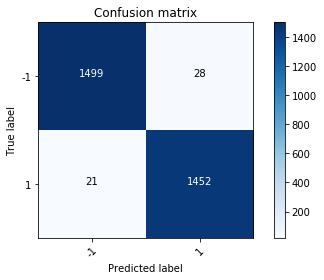

In [14]:
plot_confusion_matrix(cm1, [-1, 1], cmap=plt.cm.Blues)

In [15]:
df_test["ada"]=y_pred

In [16]:
trace0 = go.Scatter(
    x = df_test[df_test["class"] == -1]["x"].values,
    y = df_test[df_test["class"] == -1]["y"].values,
    name = 'Class -1',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(152, 0, 0, .8)',
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    )
)

trace1 = go.Scatter(
    x = df_test[df_test["class"] == 1]["x"].values,
    y = df_test[df_test["class"] == 1]["x"].values,
    name = 'Class 1',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(255, 182, 193, .9)',
        line = dict(
            width = 2,
        )
    )
)


trace2 = go.Scatter(
    x = df_test[df_test["class"]!=df_test["ada"]]["x"].values,
    y = df_test[df_test["class"]!=df_test["ada"]]["y"].values,
    name = 'Not correct',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'yellow',
        line = dict(
            width = 2,
        )
    )
)


data = [trace0, trace1, trace2]

layout = dict(title = 'Scatter of AdaBoost classification',
              yaxis = dict(title="y", zeroline = False),
              xaxis = dict(title="x", zeroline = False)
             )

fig = dict(data=data, layout=layout)
iplot(fig)

#### Using Different Base Learners

In [ ]:
svc=SVC(probability=True, kernel='linear')

abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)

model = abc.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
cm2=confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm2, [-1, 1], cmap=plt.cm.Blues)

In [ ]:
df_test["ada_learn"]=y_pred

In [ ]:
trace0 = go.Scatter(
    x = df_test[df_test["class"] == -1]["x"].values,
    y = df_test[df_test["class"] == -1]["y"].values,
    name = 'Class -1',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(152, 0, 0, .8)',
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    )
)

trace1 = go.Scatter(
    x = df_test[df_test["class"] == 1]["x"].values,
    y = df_test[df_test["class"] == 1]["x"].values,
    name = 'Class 1',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(255, 182, 193, .9)',
        line = dict(
            width = 2,
        )
    )
)


trace2 = go.Scatter(
    x = df_test[df_test["class"]!=df_test["ada_learn"]]["x"].values,
    y = df_test[df_test["class"]!=df_test["ada_learn"]]["y"].values,
    name = 'Not correct',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'yellow',
        line = dict(
            width = 2,
        )
    )
)


data = [trace0, trace1, trace2]

layout = dict(title = 'Scatter of AdaBoost classification with SVC',
              yaxis = dict(title="y", zeroline = False),
              xaxis = dict(title="x", zeroline = False)
             )

fig = dict(data=data, layout=layout)
iplot(fig)

# Bagging

In [ ]:
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model.fit(X_train, y_train)
model.score(X_test,y_test)

In [ ]:
cm3=confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm3, [-1, 1], cmap=plt.cm.Blues)

In [ ]:
df_test["bagging"]=y_pred

In [ ]:
trace0 = go.Scatter(
    x = df_test[df_test["class"] == -1]["x"].values,
    y = df_test[df_test["class"] == -1]["y"].values,
    name = 'Class -1',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(152, 0, 0, .8)',
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    )
)

trace1 = go.Scatter(
    x = df_test[df_test["class"] == 1]["x"].values,
    y = df_test[df_test["class"] == 1]["x"].values,
    name = 'Class 1',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(255, 182, 193, .9)',
        line = dict(
            width = 2,
        )
    )
)


trace2 = go.Scatter(
    x = df_test[df_test["class"]!=df_test["bagging"]]["x"].values,
    y = df_test[df_test["class"]!=df_test["bagging"]]["y"].values,
    name = 'Not correct',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'yellow',
        line = dict(
            width = 2,
        )
    )
)


data = [trace0, trace1, trace2]

layout = dict(title = 'Scatter of Bagging classification',
              yaxis = dict(title="y", zeroline = False),
              xaxis = dict(title="x", zeroline = False)
             )

fig = dict(data=data, layout=layout)
iplot(fig)

# Random Forest

In [ ]:
model= RandomForestClassifier(random_state=1)
model.fit(X_train, y_train)
model.score(X_test,y_test)

In [ ]:
cm4=confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm4, [-1, 1], cmap=plt.cm.Blues)

In [ ]:
df_test["rforest"]=y_pred

In [ ]:
trace0 = go.Scatter(
    x = df_test[df_test["class"] == -1]["x"].values,
    y = df_test[df_test["class"] == -1]["y"].values,
    name = 'Class -1',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(152, 0, 0, .8)',
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    )
)

trace1 = go.Scatter(
    x = df_test[df_test["class"] == 1]["x"].values,
    y = df_test[df_test["class"] == 1]["x"].values,
    name = 'Class 1',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(255, 182, 193, .9)',
        line = dict(
            width = 2,
        )
    )
)


trace2 = go.Scatter(
    x = df_test[df_test["class"]!=df_test["rforest"]]["x"].values,
    y = df_test[df_test["class"]!=df_test["rforest"]]["y"].values,
    name = 'Not correct',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'yellow',
        line = dict(
            width = 2,
        )
    )
)


data = [trace0, trace1, trace2]

layout = dict(title = 'Scatter of Bagging classification',
              yaxis = dict(title="y", zeroline = False),
              xaxis = dict(title="x", zeroline = False)
             )

fig = dict(data=data, layout=layout)
iplot(fig)